# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

17:48:09 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=951741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=482538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=622716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=465223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

17:48:10 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=317436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=493420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

17:48:11 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=903589;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=345012;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

17:48:12 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=519714;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=734266;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

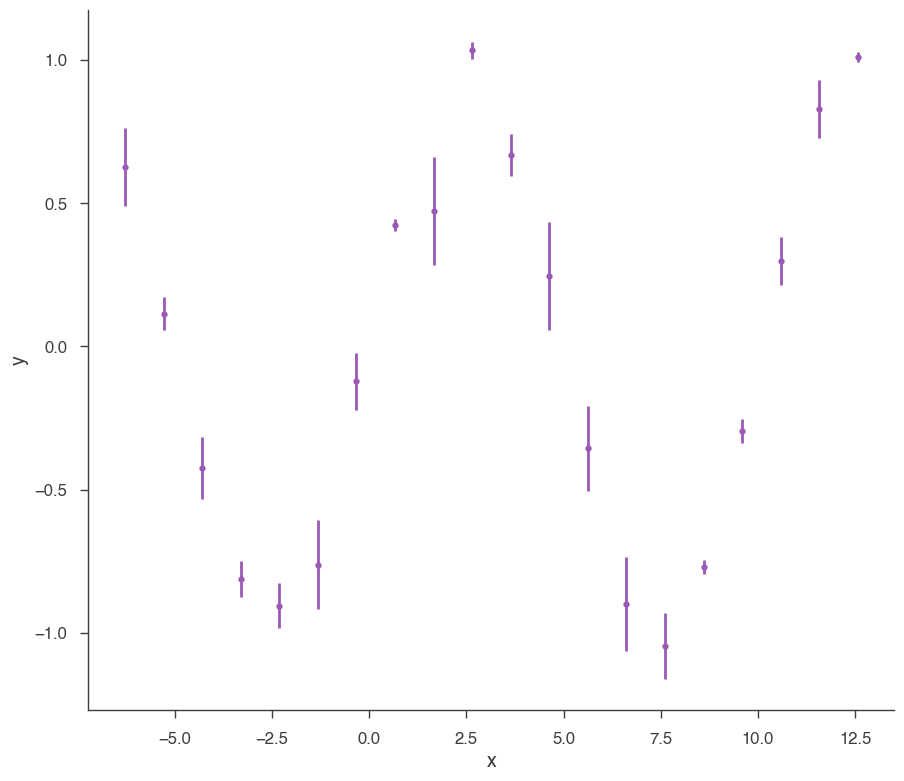

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=724755;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=227598;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

17:48:15 INFO      Mean acceptance fraction: 0.7232999999999998                                ]8;id=850284;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=922674;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=363597;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=765861;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=629433;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=212684;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.076469
total,-7.076469


Values of statistical measures:

,statistical measures
AIC,18.858820
BIC,20.144402
DIC,18.013470
PDIC,1.920686


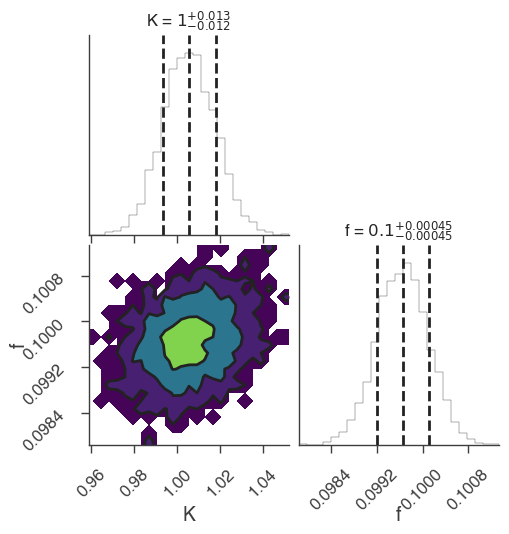

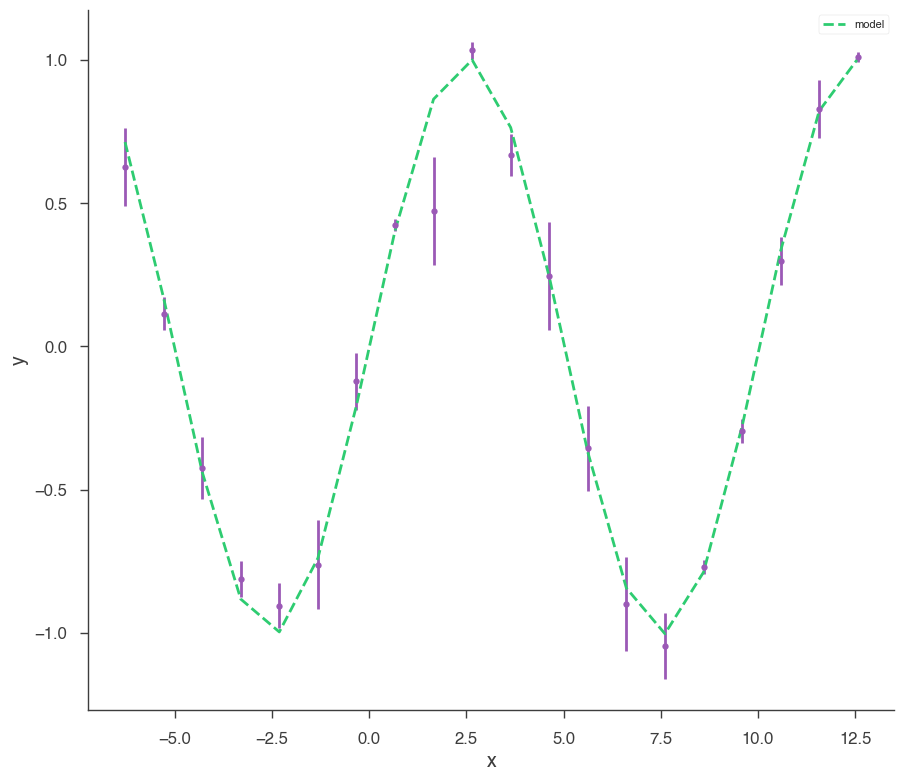

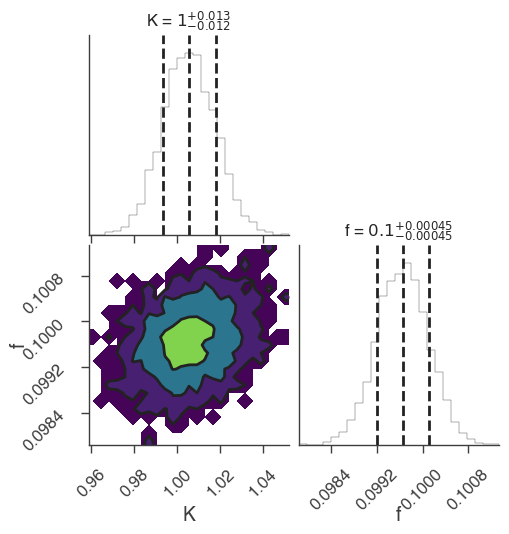

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

17:48:16 INFO      sampler set to multinest                                                ]8;id=344727;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=884666;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -16.780978950250198      +/-  0.14745010570793088     
 Total Likelihood Evaluations:         5706
 Sampling finished. Exiting MultiNest



17:48:17 INFO      fit restored to maximum of posterior                                         ]8;id=976242;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=746163;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=947110;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=74454;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.014 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.076425
total,-7.076425


Values of statistical measures:

,statistical measures
AIC,18.858733
BIC,20.144315
DIC,18.114289
PDIC,1.980160
log(Z),-7.287887


         INFO      deleting the chain directory chains                                     ]8;id=373111;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=774327;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

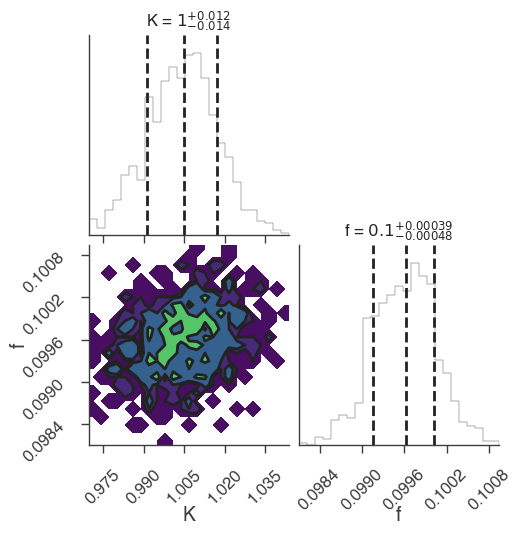

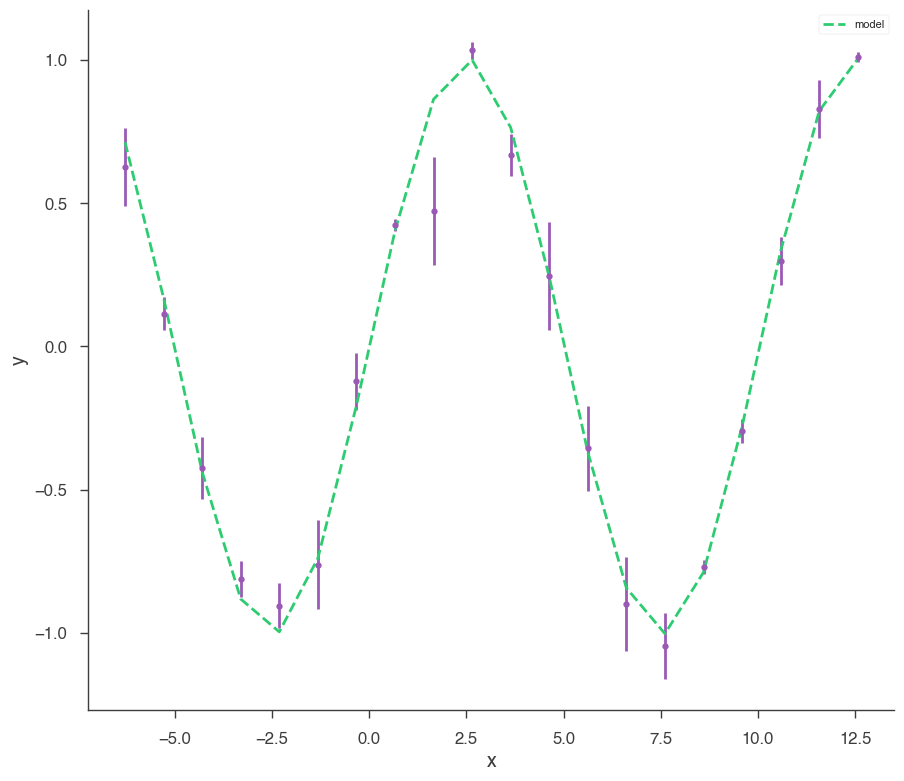

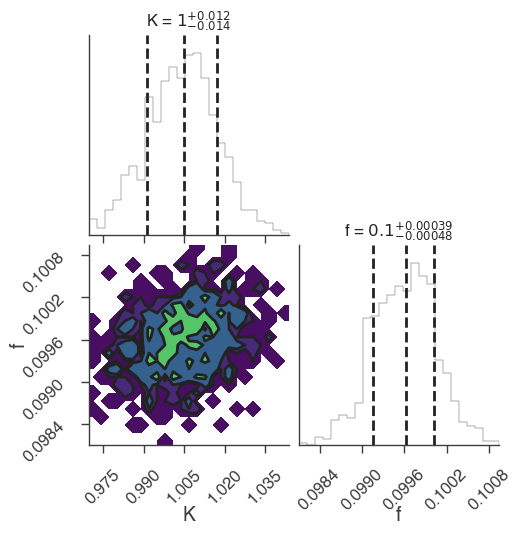

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=722466;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=894735;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

264it [00:00, 2639.71it/s, bound: 0 | nc: 2 | ncall: 749 | eff(%): 35.247 | loglstar:   -inf < -4550.473 <    inf | logz: -4557.817 +/-  0.135 | dlogz: 4527.311 >  0.409]

528it [00:00, 1943.54it/s, bound: 0 | nc: 5 | ncall: 1472 | eff(%): 35.870 | loglstar:   -inf < -2796.410 <    inf | logz: -2804.086 +/-  0.133 | dlogz: 2743.514 >  0.409]

734it [00:00, 1448.92it/s, bound: 0 | nc: 2 | ncall: 2510 | eff(%): 29.243 | loglstar:   -inf < -2227.901 <    inf | logz: -2236.244 +/-  0.139 | dlogz: 2220.429 >  0.409]

894it [00:00, 1181.02it/s, bound: 0 | nc: 3 | ncall: 3556 | eff(%): 25.141 | loglstar:   -inf < -1727.383 <    inf | logz: -1735.870 +/-  0.141 | dlogz: 1724.904 >  0.409]

1024it [00:00, 936.13it/s, bound: 0 | nc: 1 | ncall: 4907 | eff(%): 20.868 | loglstar:   -inf < -1429.301 <    inf | logz: -1437.465 +/-  0.138 | dlogz: 1425.391 >  0.409]

1128it [00:01, 747.98it/s, bound: 0 | nc: 2 | ncall: 6321 | eff(%): 17.845 | loglstar:   -inf < -1260.519 <    inf | logz: -1268.950 +/-  0.137 | dlogz: 1256.435 >  0.409]

1212it [00:01, 653.47it/s, bound: 0 | nc: 30 | ncall: 7587 | eff(%): 15.975 | loglstar:   -inf < -1087.572 <    inf | logz: -1096.515 +/-  0.147 | dlogz: 1087.389 >  0.409]

1283it [00:01, 578.48it/s, bound: 0 | nc: 87 | ncall: 9294 | eff(%): 13.805 | loglstar:   -inf < -837.126 <    inf | logz: -847.013 +/-  0.157 | dlogz: 845.557 >  0.409]   

1344it [00:01, 536.36it/s, bound: 0 | nc: 27 | ncall: 10500 | eff(%): 12.800 | loglstar:   -inf < -724.407 <    inf | logz: -733.301 +/-  0.144 | dlogz: 723.317 >  0.409]

1399it [00:01, 490.03it/s, bound: 0 | nc: 16 | ncall: 11930 | eff(%): 11.727 | loglstar:   -inf < -599.680 <    inf | logz: -609.086 +/-  0.148 | dlogz: 599.281 >  0.409]

1449it [00:02, 383.19it/s, bound: 0 | nc: 16 | ncall: 13674 | eff(%): 10.597 | loglstar:   -inf < -521.934 <    inf | logz: -532.198 +/-  0.159 | dlogz: 524.809 >  0.409]

1490it [00:02, 295.35it/s, bound: 1 | nc: 1 | ncall: 14862 | eff(%): 10.026 | loglstar:   -inf < -468.888 <    inf | logz: -478.601 +/-  0.151 | dlogz: 468.705 >  0.409] 

1697it [00:02, 593.66it/s, bound: 1 | nc: 4 | ncall: 15226 | eff(%): 11.145 | loglstar:   -inf < -256.538 <    inf | logz: -266.222 +/-  0.148 | dlogz: 255.225 >  0.409]

1792it [00:02, 593.53it/s, bound: 2 | nc: 1 | ncall: 15448 | eff(%): 11.600 | loglstar:   -inf < -196.520 <    inf | logz: -206.143 +/-  0.150 | dlogz: 194.716 >  0.409]

2019it [00:02, 926.17it/s, bound: 2 | nc: 4 | ncall: 15801 | eff(%): 12.778 | loglstar:   -inf < -116.824 <    inf | logz: -126.379 +/-  0.150 | dlogz: 114.326 >  0.409]

2142it [00:02, 865.95it/s, bound: 3 | nc: 1 | ncall: 16080 | eff(%): 13.321 | loglstar:   -inf < -83.483 <    inf | logz: -93.632 +/-  0.148 | dlogz: 81.268 >  0.409]   

2361it [00:02, 1151.10it/s, bound: 3 | nc: 1 | ncall: 16429 | eff(%): 14.371 | loglstar:   -inf < -50.518 <    inf | logz: -59.831 +/-  0.146 | dlogz: 46.903 >  0.409]

2503it [00:03, 1004.03it/s, bound: 4 | nc: 2 | ncall: 16722 | eff(%): 14.968 | loglstar:   -inf < -36.922 <    inf | logz: -46.249 +/-  0.146 | dlogz: 32.976 >  0.409]

2707it [00:03, 1227.24it/s, bound: 4 | nc: 5 | ncall: 17092 | eff(%): 15.838 | loglstar:   -inf < -24.374 <    inf | logz: -33.859 +/-  0.146 | dlogz: 20.059 >  0.409]

2853it [00:03, 1125.90it/s, bound: 5 | nc: 1 | ncall: 17347 | eff(%): 16.447 | loglstar:   -inf < -19.369 <    inf | logz: -28.964 +/-  0.146 | dlogz: 14.799 >  0.409]

3042it [00:03, 1299.99it/s, bound: 5 | nc: 1 | ncall: 17688 | eff(%): 17.198 | loglstar:   -inf < -14.980 <    inf | logz: -24.574 +/-  0.147 | dlogz:  9.928 >  0.409]

3190it [00:03, 1141.94it/s, bound: 6 | nc: 2 | ncall: 17946 | eff(%): 17.776 | loglstar:   -inf < -12.504 <    inf | logz: -22.163 +/-  0.147 | dlogz:  7.143 >  0.409]

3409it [00:03, 1382.60it/s, bound: 6 | nc: 1 | ncall: 18360 | eff(%): 18.568 | loglstar:   -inf < -10.113 <    inf | logz: -19.868 +/-  0.147 | dlogz:  4.308 >  0.409]

3565it [00:03, 1195.23it/s, bound: 7 | nc: 1 | ncall: 18613 | eff(%): 19.153 | loglstar:   -inf < -9.052 <    inf | logz: -18.760 +/-  0.148 | dlogz:  2.854 >  0.409] 

3756it [00:04, 1357.46it/s, bound: 7 | nc: 2 | ncall: 18984 | eff(%): 19.785 | loglstar:   -inf < -8.313 <    inf | logz: -17.941 +/-  0.147 | dlogz:  1.699 >  0.409]

3908it [00:04, 1209.20it/s, bound: 8 | nc: 2 | ncall: 19206 | eff(%): 20.348 | loglstar:   -inf < -7.922 <    inf | logz: -17.540 +/-  0.147 | dlogz:  1.113 >  0.409]

4102it [00:04, 1379.31it/s, bound: 8 | nc: 6 | ncall: 19579 | eff(%): 20.951 | loglstar:   -inf < -7.586 <    inf | logz: -17.204 +/-  0.147 | dlogz:  0.641 >  0.409]

4255it [00:04, 1239.37it/s, bound: 9 | nc: 1 | ncall: 19810 | eff(%): 21.479 | loglstar:   -inf < -7.427 <    inf | logz: -17.035 +/-  0.147 | dlogz:  0.418 >  0.409]

4262it [00:04, 950.04it/s, +400 | bound: 9 | nc: 1 | ncall: 20224 | eff(%): 23.517 | loglstar:   -inf < -7.072 <    inf | logz: -16.672 +/-  0.146 | dlogz:  0.001 >  0.409]

17:48:22 INFO      fit restored to maximum of posterior                                         ]8;id=603178;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=366076;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=51557;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=285135;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.013 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.076412
total,-7.076412


Values of statistical measures:

,statistical measures
AIC,18.858705
BIC,20.144288
DIC,17.994049
PDIC,1.920448
log(Z),-7.240442


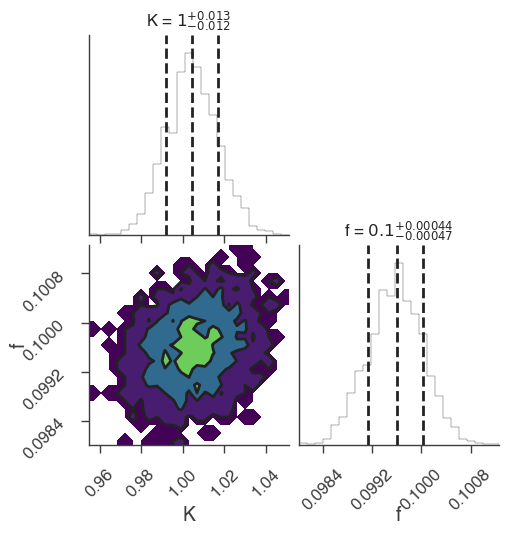

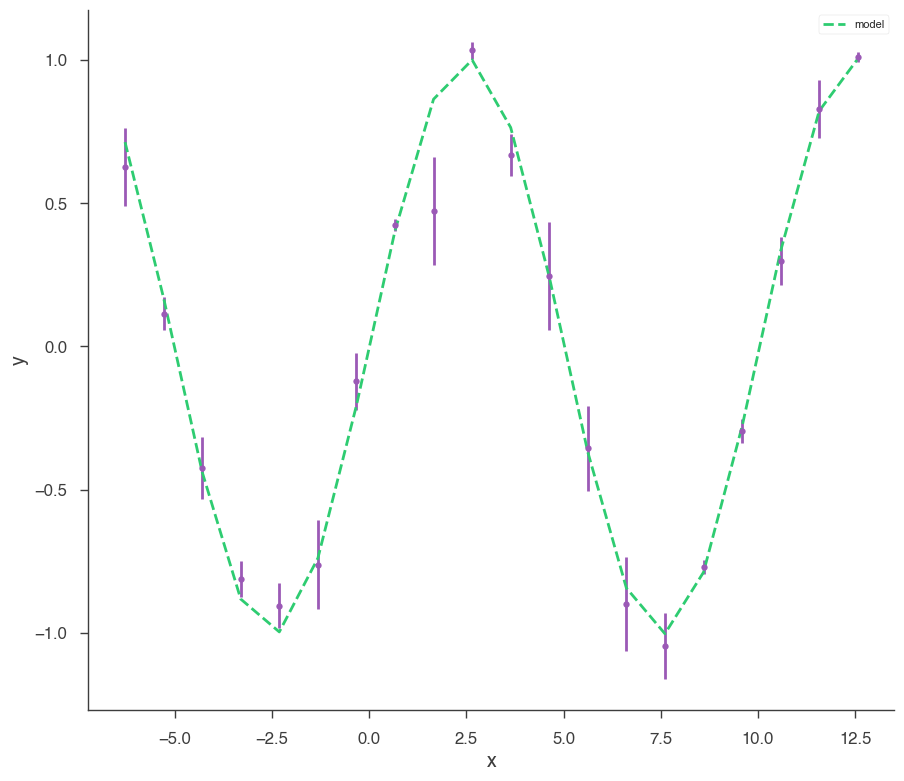

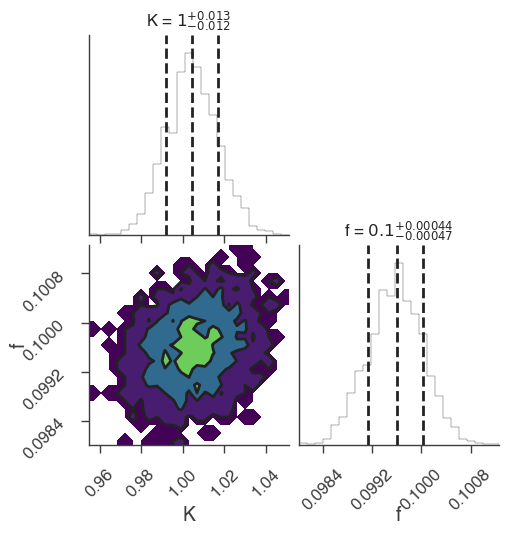

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

17:48:23 INFO      sampler set to dynesty_dynamic                                          ]8;id=750352;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=746596;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

123it [00:00, 1226.43it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 143 | eff(%): 19.129 | loglstar:   -inf < -7057.568 <    inf | logz: -7064.721 +/-  0.120 | dlogz: 7064.805 >  0.010]

349it [00:00, 1829.62it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 491 | eff(%): 35.217 | loglstar:   -inf < -4867.922 <    inf | logz: -4875.482 +/-  0.121 | dlogz: 4822.128 >  0.010]

542it [00:00, 1868.32it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 885 | eff(%): 39.134 | loglstar:   -inf < -3383.254 <    inf | logz: -3391.244 +/-  0.126 | dlogz: 3392.967 >  0.010]

729it [00:00, 1655.31it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1479 | eff(%): 36.837 | loglstar:   -inf < -2653.572 <    inf | logz: -2660.534 +/-  0.114 | dlogz: 2647.369 >  0.010]

898it [00:00, 1498.85it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2273 | eff(%): 32.384 | loglstar:   -inf < -2230.957 <    inf | logz: -2239.611 +/-  0.130 | dlogz: 2229.223 >  0.010]

1052it [00:00, 1229.58it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3355 | eff(%): 27.289 | loglstar:   -inf < -1793.031 <    inf | logz: -1801.809 +/-  0.128 | dlogz: 1793.555 >  0.010]

1183it [00:00, 1001.43it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4451 | eff(%): 23.894 | loglstar:   -inf < -1589.035 <    inf | logz: -1597.322 +/-  0.124 | dlogz: 1587.720 >  0.010]

1293it [00:01, 865.83it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5825 | eff(%): 20.443 | loglstar:   -inf < -1394.064 <    inf | logz: -1403.555 +/-  0.138 | dlogz: 1405.071 >  0.010] 

1388it [00:01, 722.60it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 7035 | eff(%): 18.421 | loglstar:   -inf < -1251.352 <    inf | logz: -1260.293 +/-  0.131 | dlogz: 1251.131 >  0.010]

1468it [00:01, 624.48it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 8175 | eff(%): 16.922 | loglstar:   -inf < -1163.499 <    inf | logz: -1172.583 +/-  0.128 | dlogz: 1162.878 >  0.010]

1536it [00:01, 515.79it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 9525 | eff(%): 15.322 | loglstar:   -inf < -988.871 <    inf | logz: -998.838 +/-  0.141 | dlogz: 993.006 >  0.010]   

1593it [00:01, 471.12it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 10521 | eff(%): 14.454 | loglstar:   -inf < -833.879 <    inf | logz: -843.799 +/-  0.138 | dlogz: 835.667 >  0.010]

1644it [00:02, 415.71it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 11630 | eff(%): 13.553 | loglstar:   -inf < -756.437 <    inf | logz: -766.179 +/-  0.134 | dlogz: 756.936 >  0.010]

1688it [00:02, 360.38it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 12804 | eff(%): 12.688 | loglstar:   -inf < -687.749 <    inf | logz: -697.447 +/-  0.134 | dlogz: 687.887 >  0.010] 

1726it [00:02, 318.11it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 13902 | eff(%): 11.984 | loglstar:   -inf < -632.682 <    inf | logz: -642.897 +/-  0.140 | dlogz: 634.640 >  0.010]

1759it [00:02, 283.66it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 14885 | eff(%): 11.433 | loglstar:   -inf < -603.132 <    inf | logz: -612.562 +/-  0.128 | dlogz: 602.207 >  0.010]

1789it [00:02, 281.73it/s, batch: 0 | bound: 0 | nc: 167 | ncall: 15552 | eff(%): 11.145 | loglstar:   -inf < -558.483 <    inf | logz: -567.981 +/-  0.136 | dlogz: 558.076 >  0.010]

1818it [00:02, 231.70it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 16844 | eff(%): 10.482 | loglstar:   -inf < -525.696 <    inf | logz: -535.080 +/-  0.134 | dlogz: 524.935 >  0.010] 

1843it [00:03, 233.83it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 17808 | eff(%): 10.067 | loglstar:   -inf < -497.361 <    inf | logz: -506.810 +/-  0.132 | dlogz: 496.439 >  0.010]

1868it [00:03, 202.88it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18074 | eff(%): 10.057 | loglstar:   -inf < -466.069 <    inf | logz: -475.565 +/-  0.132 | dlogz: 465.134 >  0.010] 

2075it [00:03, 599.85it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18400 | eff(%): 10.979 | loglstar:   -inf < -304.636 <    inf | logz: -314.319 +/-  0.130 | dlogz: 303.403 >  0.010]

2229it [00:03, 818.77it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18785 | eff(%): 11.558 | loglstar:   -inf < -215.689 <    inf | logz: -225.206 +/-  0.133 | dlogz: 213.860 >  0.010]

2329it [00:03, 734.82it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18940 | eff(%): 11.980 | loglstar:   -inf < -178.480 <    inf | logz: -187.821 +/-  0.131 | dlogz: 176.191 >  0.010]

2509it [00:03, 982.68it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19262 | eff(%): 12.696 | loglstar:   -inf < -122.570 <    inf | logz: -132.109 +/-  0.131 | dlogz: 120.059 >  0.010]

2625it [00:03, 815.33it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19568 | eff(%): 13.081 | loglstar:   -inf < -96.008 <    inf | logz: -106.068 +/-  0.134 | dlogz: 93.879 >  0.010]  

2831it [00:03, 1089.63it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19882 | eff(%): 13.890 | loglstar:   -inf < -65.134 <    inf | logz: -75.015 +/-  0.135 | dlogz: 62.290 >  0.010]

2993it [00:04, 1216.31it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20232 | eff(%): 14.437 | loglstar:   -inf < -50.528 <    inf | logz: -59.998 +/-  0.130 | dlogz: 46.871 >  0.010]

3133it [00:04, 1004.04it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20436 | eff(%): 14.965 | loglstar:   -inf < -40.419 <    inf | logz: -50.077 +/-  0.132 | dlogz: 36.663 >  0.010]

3328it [00:04, 1215.70it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20771 | eff(%): 15.646 | loglstar:   -inf < -29.891 <    inf | logz: -39.596 +/-  0.132 | dlogz: 25.918 >  0.010]

3470it [00:04, 1038.30it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21084 | eff(%): 16.077 | loglstar:   -inf < -24.318 <    inf | logz: -34.256 +/-  0.132 | dlogz: 20.291 >  0.010]

3686it [00:04, 1285.88it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21395 | eff(%): 16.835 | loglstar:   -inf < -18.091 <    inf | logz: -28.086 +/-  0.133 | dlogz: 13.678 >  0.010]

3857it [00:04, 1382.55it/s, batch: 0 | bound: 5 | nc: 10 | ncall: 21779 | eff(%): 17.312 | loglstar:   -inf < -15.064 <    inf | logz: -24.751 +/-  0.132 | dlogz:  9.987 >  0.010]

4013it [00:04, 1200.30it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21982 | eff(%): 17.850 | loglstar:   -inf < -13.131 <    inf | logz: -22.830 +/-  0.132 | dlogz:  7.752 >  0.010] 

4207it [00:05, 1372.52it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22307 | eff(%): 18.446 | loglstar:   -inf < -11.253 <    inf | logz: -21.009 +/-  0.132 | dlogz:  5.543 >  0.010]

4360it [00:05, 1101.69it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22604 | eff(%): 18.871 | loglstar:   -inf < -10.049 <    inf | logz: -19.886 +/-  0.133 | dlogz:  4.126 >  0.010]

4574it [00:05, 1327.74it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22928 | eff(%): 19.524 | loglstar:   -inf < -8.997 <    inf | logz: -18.817 +/-  0.133 | dlogz:  2.682 >  0.010] 

4746it [00:05, 1420.84it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23299 | eff(%): 19.942 | loglstar:   -inf < -8.464 <    inf | logz: -18.244 +/-  0.133 | dlogz:  1.862 >  0.010]

4906it [00:05, 1155.08it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23520 | eff(%): 20.425 | loglstar:   -inf < -8.071 <    inf | logz: -17.874 +/-  0.133 | dlogz:  1.315 >  0.010]

5089it [00:05, 1303.38it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23880 | eff(%): 20.874 | loglstar:   -inf < -7.746 <    inf | logz: -17.564 +/-  0.133 | dlogz:  0.870 >  0.010]

5239it [00:05, 1056.16it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24142 | eff(%): 21.260 | loglstar:   -inf < -7.580 <    inf | logz: -17.383 +/-  0.133 | dlogz:  0.619 >  0.010]

5442it [00:06, 1261.65it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24475 | eff(%): 21.790 | loglstar:   -inf < -7.409 <    inf | logz: -17.211 +/-  0.133 | dlogz:  0.393 >  0.010]

5600it [00:06, 1086.41it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24813 | eff(%): 22.123 | loglstar:   -inf < -7.324 <    inf | logz: -17.119 +/-  0.133 | dlogz:  0.278 >  0.010]

5829it [00:06, 1340.61it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 25118 | eff(%): 22.754 | loglstar:   -inf < -7.234 <    inf | logz: -17.028 +/-  0.133 | dlogz:  0.170 >  0.010]

5989it [00:06, 1398.57it/s, batch: 0 | bound: 10 | nc: 7 | ncall: 25482 | eff(%): 23.051 | loglstar:   -inf < -7.185 <    inf | logz: -16.985 +/-  0.133 | dlogz:  0.121 >  0.010]

6148it [00:06, 1164.98it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25724 | eff(%): 23.444 | loglstar:   -inf < -7.154 <    inf | logz: -16.953 +/-  0.133 | dlogz:  0.087 >  0.010]

6342it [00:06, 1336.26it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 26076 | eff(%): 23.864 | loglstar:   -inf < -7.127 <    inf | logz: -16.927 +/-  0.133 | dlogz:  0.058 >  0.010]

6495it [00:06, 1100.62it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26356 | eff(%): 24.185 | loglstar:   -inf < -7.110 <    inf | logz: -16.912 +/-  0.133 | dlogz:  0.043 >  0.010]

6709it [00:07, 1322.04it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26656 | eff(%): 24.705 | loglstar:   -inf < -7.097 <    inf | logz: -16.897 +/-  0.133 | dlogz:  0.028 >  0.010]

6886it [00:07, 1426.58it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 27019 | eff(%): 25.023 | loglstar:   -inf < -7.090 <    inf | logz: -16.889 +/-  0.133 | dlogz:  0.019 >  0.010]

7047it [00:07, 1203.66it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 27242 | eff(%): 25.402 | loglstar:   -inf < -7.084 <    inf | logz: -16.884 +/-  0.133 | dlogz:  0.014 >  0.010]

7325it [00:07, 1561.08it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27639 | eff(%): 26.136 | loglstar:   -inf < -7.079 <    inf | logz: -16.878 +/-  0.133 | dlogz:  0.008 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7712it [00:08, 861.10it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 28026 | eff(%): 27.517 | loglstar: -8.947 < -8.578 < -7.543 | logz: -16.870 +/-  0.136 | stop:  1.367]            

7917it [00:08, 1008.11it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 28287 | eff(%): 27.487 | loglstar: -8.947 < -8.307 < -7.543 | logz: -16.870 +/-  0.136 | stop:  1.367]

8099it [00:08, 1130.02it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 28647 | eff(%): 27.771 | loglstar: -8.947 < -7.899 < -7.543 | logz: -16.870 +/-  0.136 | stop:  1.367]

8267it [00:08, 1051.86it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28928 | eff(%): 28.077 | loglstar: -8.947 < -7.693 < -7.543 | logz: -16.870 +/-  0.136 | stop:  1.367]

8608it [00:08, 1471.27it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29347 | eff(%): 29.008 | loglstar: -8.947 < -7.377 < -7.543 | logz: -16.870 +/-  0.136 | stop:  1.367]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8925it [00:09, 733.23it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 29675 | eff(%): 30.076 | loglstar: -9.416 < -8.587 < -8.941 | logz: -16.871 +/-  0.111 | stop:  1.041] 

9335it [00:09, 1085.66it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30118 | eff(%): 30.780 | loglstar: -9.416 < -7.758 < -8.941 | logz: -16.871 +/-  0.111 | stop:  1.041]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9521it [00:10, 939.22it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30328 | eff(%): 31.393 | loglstar: -9.416 < -7.082 < -8.941 | logz: -16.871 +/-  0.111 | stop:  0.917] 

17:48:33 INFO      fit restored to maximum of posterior                                         ]8;id=93013;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=723639;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=197152;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=278995;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.076592
total,-7.076592


Values of statistical measures:

,statistical measures
AIC,18.859066
BIC,20.144648
DIC,18.112423
PDIC,1.979328
log(Z),-7.324556


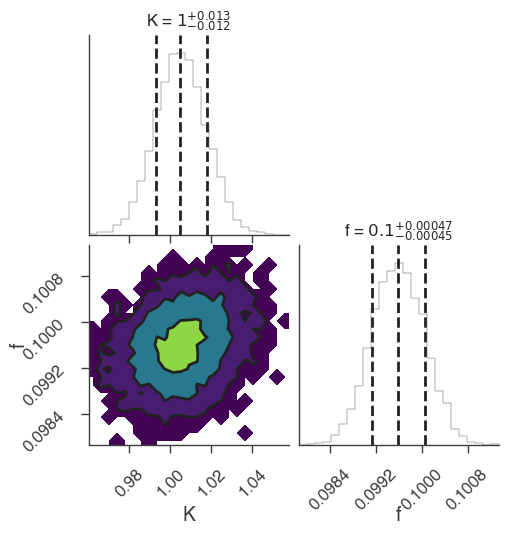

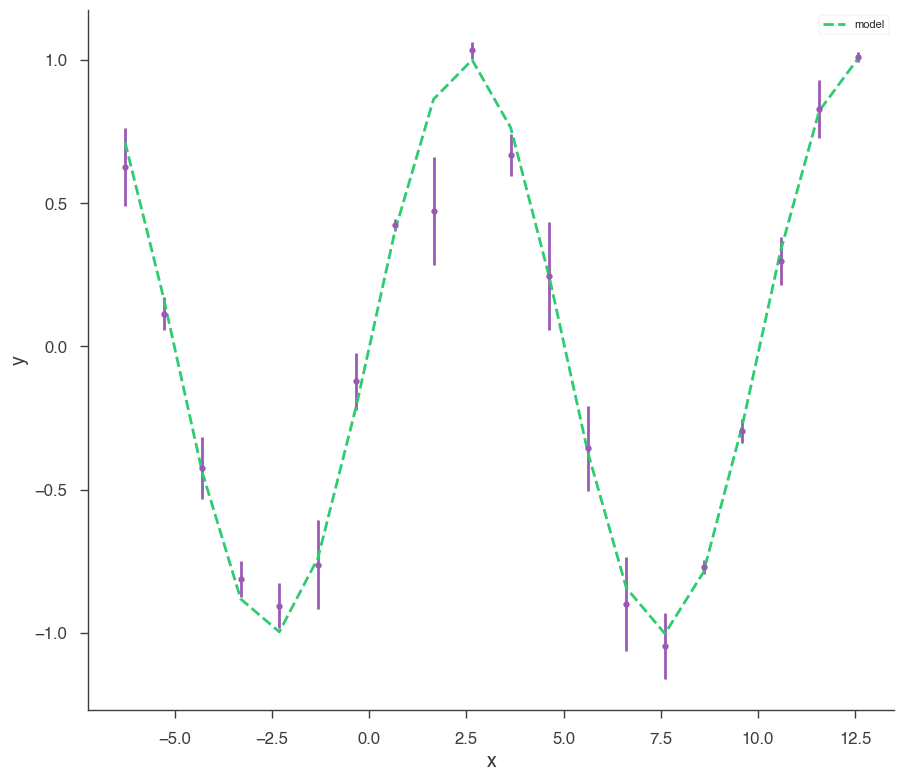

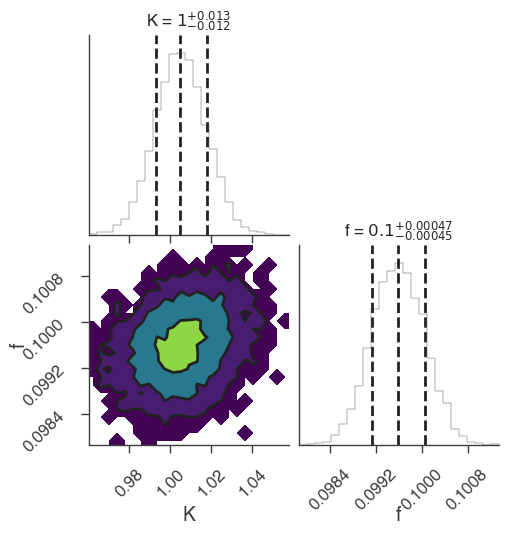

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

17:48:34 INFO      sampler set to zeus                                                     ]8;id=800162;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=8686;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 55.76it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:09, 62.45it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:09, 66.38it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:08, 74.01it/s]

Sampling progress :   6%|▌         | 38/625 [00:00<00:08, 69.57it/s]

Sampling progress :   7%|▋         | 46/625 [00:00<00:08, 70.35it/s]

Sampling progress :   9%|▊         | 54/625 [00:00<00:07, 72.38it/s]

Sampling progress :  10%|▉         | 62/625 [00:00<00:07, 73.96it/s]

Sampling progress :  11%|█▏        | 71/625 [00:00<00:07, 76.47it/s]

Sampling progress :  13%|█▎        | 79/625 [00:01<00:07, 75.18it/s]

Sampling progress :  14%|█▍        | 87/625 [00:01<00:07, 76.04it/s]

Sampling progress :  15%|█▌        | 95/625 [00:01<00:07, 73.81it/s]

Sampling progress :  16%|█▋        | 103/625 [00:01<00:07, 73.43it/s]

Sampling progress :  18%|█▊        | 111/625 [00:01<00:07, 72.15it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:06, 72.36it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:07, 70.67it/s]

Sampling progress :  22%|██▏       | 135/625 [00:01<00:06, 71.98it/s]

Sampling progress :  23%|██▎       | 143/625 [00:01<00:06, 72.16it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 75.48it/s]

Sampling progress :  26%|██▌       | 160/625 [00:02<00:06, 75.83it/s]

Sampling progress :  27%|██▋       | 169/625 [00:02<00:05, 78.54it/s]

Sampling progress :  28%|██▊       | 177/625 [00:02<00:05, 78.05it/s]

Sampling progress :  30%|██▉       | 186/625 [00:02<00:05, 80.22it/s]

Sampling progress :  31%|███       | 195/625 [00:02<00:05, 79.93it/s]

Sampling progress :  33%|███▎      | 204/625 [00:02<00:05, 81.13it/s]

Sampling progress :  34%|███▍      | 213/625 [00:02<00:05, 77.24it/s]

Sampling progress :  35%|███▌      | 221/625 [00:02<00:05, 75.94it/s]

Sampling progress :  37%|███▋      | 230/625 [00:03<00:05, 78.16it/s]

Sampling progress :  38%|███▊      | 238/625 [00:03<00:05, 76.19it/s]

Sampling progress :  39%|███▉      | 246/625 [00:03<00:05, 74.04it/s]

Sampling progress :  41%|████      | 254/625 [00:03<00:05, 73.72it/s]

Sampling progress :  42%|████▏     | 263/625 [00:03<00:04, 75.62it/s]

Sampling progress :  44%|████▎     | 272/625 [00:03<00:04, 77.29it/s]

Sampling progress :  45%|████▍     | 280/625 [00:03<00:04, 73.07it/s]

Sampling progress :  46%|████▌     | 288/625 [00:03<00:04, 73.69it/s]

Sampling progress :  47%|████▋     | 296/625 [00:03<00:04, 73.69it/s]

Sampling progress :  49%|████▊     | 304/625 [00:04<00:04, 73.70it/s]

Sampling progress :  50%|█████     | 313/625 [00:04<00:04, 76.80it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:04<00:03, 78.78it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:04<00:03, 76.92it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:04<00:03, 75.51it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:04<00:03, 79.09it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:04<00:03, 75.09it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:04<00:03, 73.80it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:04<00:03, 73.51it/s]

Sampling progress :  61%|██████    | 379/625 [00:05<00:03, 73.93it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:05<00:03, 77.51it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:05<00:02, 78.80it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:05<00:02, 75.41it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:05<00:02, 71.98it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:05<00:02, 71.20it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:05<00:02, 71.96it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:05<00:02, 72.94it/s]

Sampling progress :  71%|███████   | 445/625 [00:05<00:02, 72.37it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:06<00:02, 73.82it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:06<00:02, 72.20it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:06<00:02, 71.11it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:06<00:02, 70.95it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:06<00:01, 73.34it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:06<00:01, 75.94it/s]

Sampling progress :  80%|████████  | 502/625 [00:06<00:01, 73.19it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:06<00:01, 74.67it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:06<00:01, 76.04it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:07<00:01, 77.52it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:07<00:01, 78.59it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:07<00:01, 78.39it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:07<00:00, 77.68it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:07<00:00, 78.79it/s]

Sampling progress :  91%|█████████ | 569/625 [00:07<00:00, 77.08it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:07<00:00, 77.44it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:07<00:00, 79.45it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:07<00:00, 79.34it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:08<00:00, 80.20it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:08<00:00, 78.49it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:08<00:00, 78.11it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 75.15it/s]

17:48:43 INFO      fit restored to maximum of posterior                                         ]8;id=561780;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=752222;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=520297;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=430086;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 29


Scale Factor: 1.442735


Mean Integrated Autocorrelation Time: 2.99


Effective Sample Size: 4183.34


Number of Log Probability Evaluations: 64921


Effective Samples per Log Probability Evaluation: 0.064437


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.076474
total,-7.076474


Values of statistical measures:

,statistical measures
AIC,18.858830
BIC,20.144412
DIC,18.176572
PDIC,2.011404


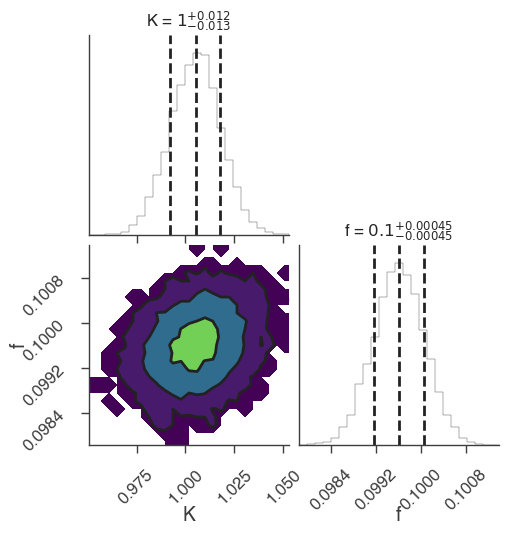

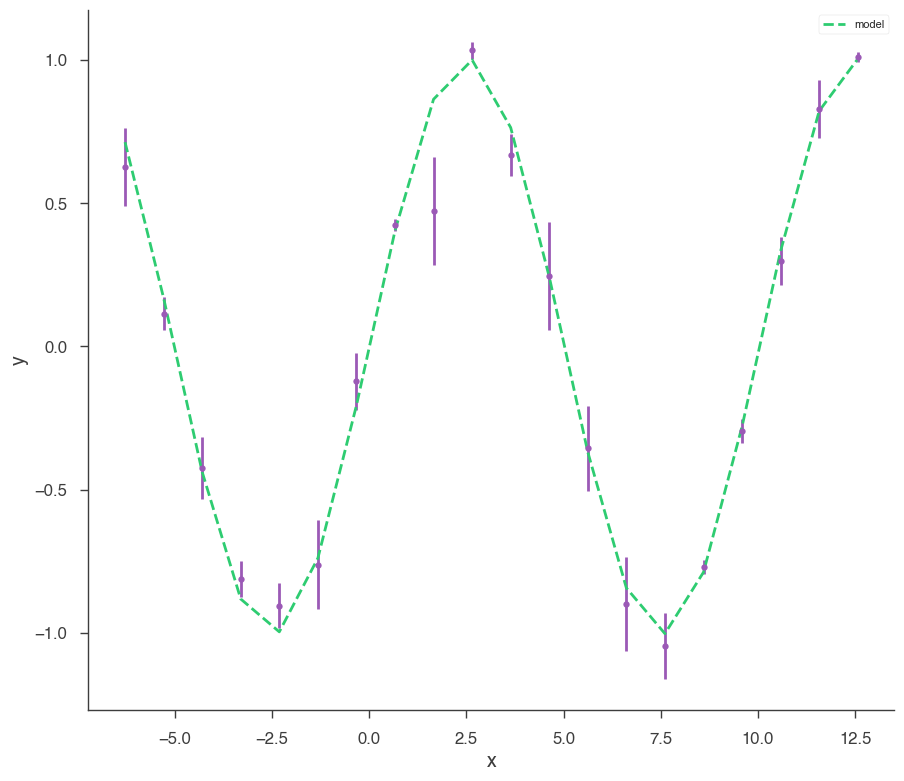

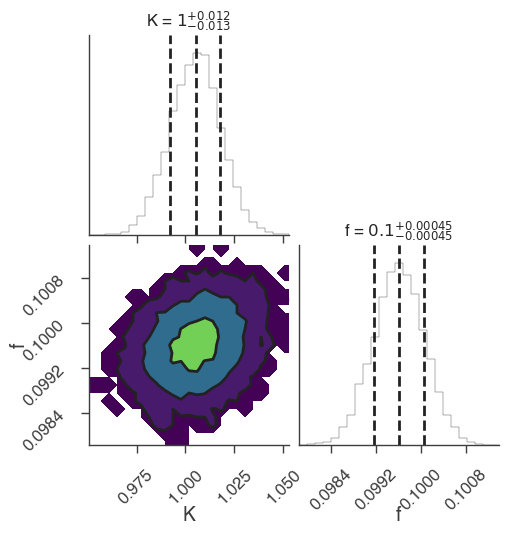

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

17:48:44 INFO      sampler set to ultranest                                                ]8;id=560272;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=358934;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7  


[ultranest] Likelihood function evaluations: 10913


[ultranest]   logZ = -16.59 +- 0.1184


[ultranest] Effective samples strategy satisfied (ESS = 963.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


17:48:51 INFO      fit restored to maximum of posterior                                         ]8;id=559394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=646916;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=982259;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=682158;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.013 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.077379
total,-7.077379


Values of statistical measures:

,statistical measures
AIC,18.860640
BIC,20.146222
DIC,17.854027
PDIC,1.850362
log(Z),-7.209935


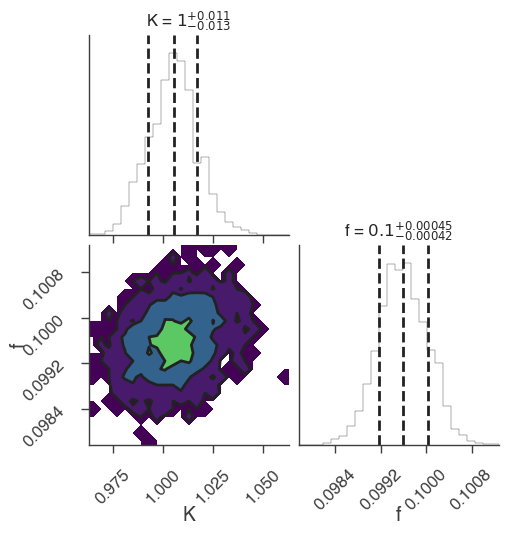

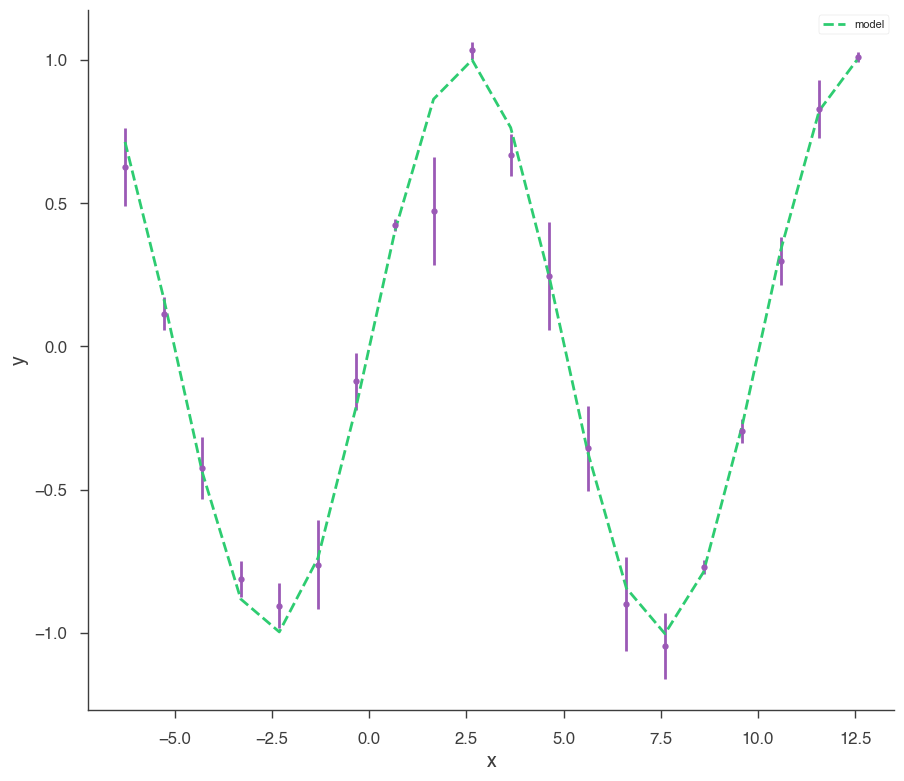

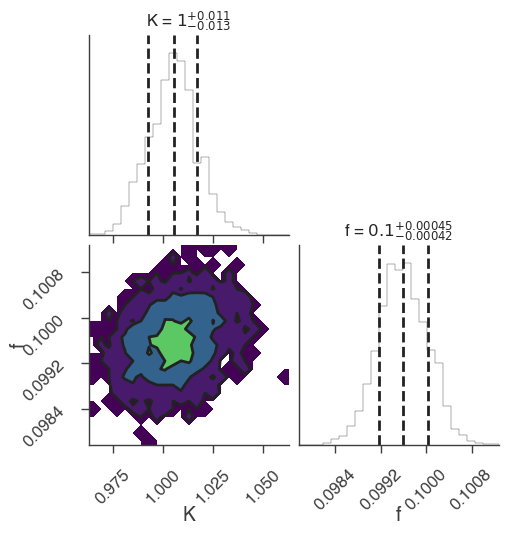

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()